In [597]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [598]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [599]:
dataset[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [600]:
dataset[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [601]:
dataset[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [602]:
dataset[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [603]:
dataset[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


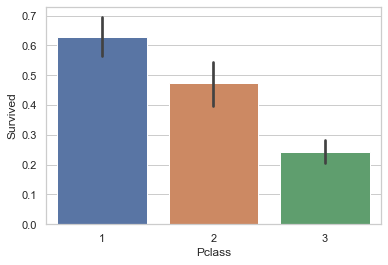

In [604]:
sns.barplot(x="Pclass",y="Survived",data=dataset)

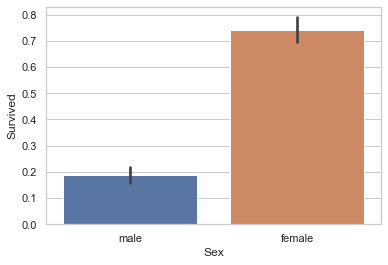

In [605]:
sns.barplot(x="Sex",y="Survived",data=dataset)

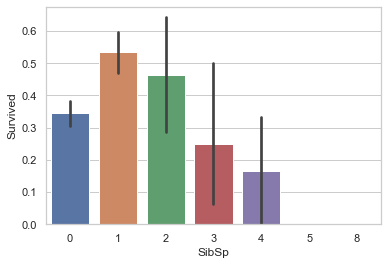

In [606]:
sns.barplot(x="SibSp",y="Survived",data=dataset)

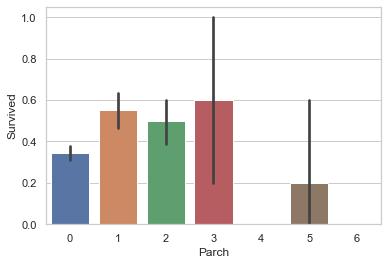

In [607]:
sns.barplot(x="Parch",y="Survived",data=dataset)

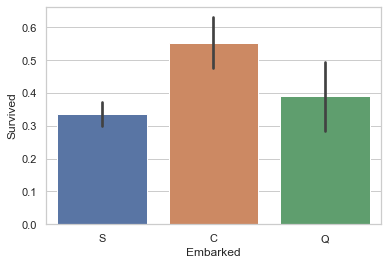

In [608]:
sns.barplot(x="Embarked",y="Survived",data=dataset)

In [609]:
dataset.Fare.agg(['max','min','mean','median'])

max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

In [610]:
dataset.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [611]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [612]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [613]:
df1=dataset[['Pclass','Sex','Age','Fare','Embarked']]
df1.fillna({'Age':df1.Age.mean(),
           'Embarked':'S'},inplace=True)
df1.isnull().sum()

d:\extra\software\python\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [614]:
### One hot encoding
df2 = pd.get_dummies(df1,columns=["Pclass","Sex","Embarked"])
df3 = df1.select_dtypes(exclude=['object']) 
final_data = pd.concat((df2,df3),axis=1) 
final_data.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,Fare
0,22.0,7.2500,0,0,1,0,1,0,0,1,3,22.0,7.2500
1,38.0,71.2833,1,0,0,1,0,1,0,0,1,38.0,71.2833
2,26.0,7.9250,0,0,1,1,0,0,0,1,3,26.0,7.9250
3,35.0,53.1000,1,0,0,1,0,0,0,1,1,35.0,53.1000
4,35.0,8.0500,0,0,1,0,1,0,0,1,3,35.0,8.0500


In [615]:
dataset=dataset.dropna()
X=dataset.loc[:,["Age","Sex","Pclass","Embarked"]]
y=dataset.loc[:,["Survived"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
a=X["Age"].values 
age=a.reshape(-1,1)
age=scaler.fit_transform(age)
X["Age"]=age
Xt=pd.get_dummies(X,columns=["Pclass","Sex","Embarked"])

Xt.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0.149065,1,0,0,1,0,1,0,0
3,-0.043230,1,0,0,1,0,0,0,1
6,1.174636,1,0,0,0,1,0,0,1
10,-2.030273,0,0,1,1,0,0,0,1
11,1.431029,1,0,0,1,0,0,0,1


In [616]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,y,test_size=.20,random_state=1)

In [617]:
PredictionAccuracy=[]
PredictionName=[]

In [618]:
#Training Data using Decesion Tree
from sklearn import tree
clf=tree.DecisionTreeClassifier(min_samples_split=70,min_samples_leaf=10)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("Decesion Tree")

Accuracy =  0.7567567567567568
Precision =  0.7586206896551724
Recall =  0.9166666666666666
F1 =  0.830188679245283


In [633]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,min_samples_split=50)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("Random Forrest Tree")

Accuracy =  0.7297297297297297
Precision =  0.7916666666666666
Recall =  0.7916666666666666
F1 =  0.7916666666666666


d:\extra\software\python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [620]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("Gaussian NB")

Accuracy =  0.7297297297297297
Precision =  0.85
Recall =  0.7083333333333334
F1 =  0.7727272727272727


d:\extra\software\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [621]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("K Neighbors")

Accuracy =  0.7837837837837838
Precision =  0.7857142857142857
Recall =  0.9166666666666666
F1 =  0.8461538461538461


d:\extra\software\python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [622]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0,solver="sag",multi_class="multinomial")
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("Logistic Regression")

Accuracy =  0.7027027027027027
Precision =  0.7407407407407407
Recall =  0.8333333333333334
F1 =  0.7843137254901961


d:\extra\software\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [623]:
from sklearn import svm
clf=svm.SVC()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(ytest,ypred))
from sklearn.metrics import precision_score
print("Precision = ",precision_score(ytest,ypred))
from sklearn.metrics import recall_score
print("Recall = ",recall_score(ytest,ypred))
from sklearn.metrics import f1_score
print("F1 = ",f1_score(ytest,ypred))
PredictionAccuracy.append(accuracy_score(ytest,ypred)*100)
PredictionName.append("Support Vector Machine")

Accuracy =  0.7297297297297297
Precision =  0.7692307692307693
Recall =  0.8333333333333334
F1 =  0.8


d:\extra\software\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


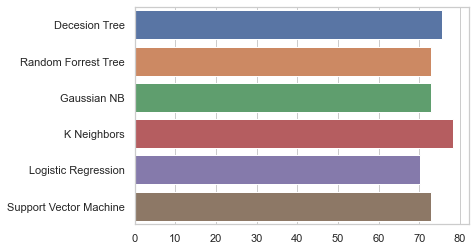

In [624]:
sns.barplot(x=PredictionAccuracy,y=PredictionName)

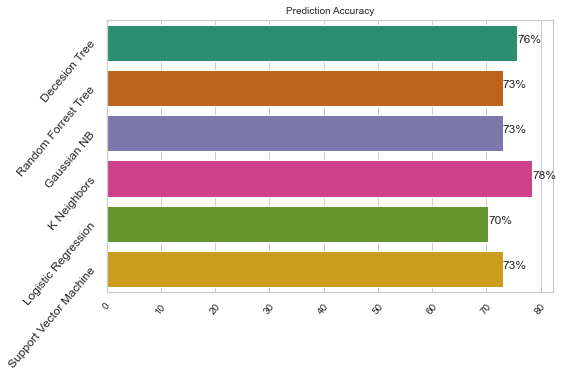

In [625]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize =(8,5))
sns.set_style('whitegrid')
sns.set_context('notebook')
#sns.set(font_scale=2)
plt.fontsize =(10)

ax=sns.barplot( palette="Dark2",ax=ax,

            x=PredictionAccuracy, y=PredictionName)
total=len(PredictionAccuracy)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

plt.xticks(rotation =50,fontsize =10)
plt.yticks(rotation =50,fontsize =12)

plt.title('Prediction Accuracy',
         fontsize =10 
         )

plt.show ()